# Match Analysis

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


%matplotlib inline

## Data Cleaning and Exploration

In [109]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [110]:
matches.shape

(756, 14)

In [111]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only SRH VS MI matches

In [112]:
SM = matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Mumbai Indians'))]

In [113]:
SM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium
47,2017,Hyderabad,2017-05-08,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal"
423,2013,Hyderabad,2013-05-01,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,I Sharma,"Rajiv Gandhi International Stadium, Uppal"
444,2013,Mumbai,2013-05-13,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,normal,0,Mumbai Indians,0,7,KA Pollard,Wankhede Stadium
477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [114]:
SM.shape

(14, 14)

In [115]:
SM.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

In [116]:
SM.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [117]:
SM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,14.0,13.642857,24.503083,0.0,0.0,0.0,18.75,85.0
win_by_wickets,14.0,3.500000,3.632122,0.0,0.0,2.5,7.00,9.0


## HEAD TO HEAD

In [118]:
SM.groupby("winner")["winner"].count()

winner
Mumbai Indians         7
Sunrisers Hyderabad    7
Name: winner, dtype: int64

Text(0.5, 1.0, 'SRH VS MI-head to head')

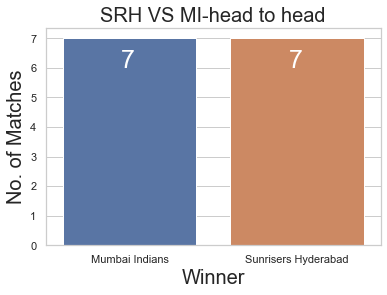

In [119]:
sns.countplot(SM["winner"])
plt.text(-0.05,6,str(SM['winner'].value_counts()['Mumbai Indians']),size=25,color='white')
plt.text(0.95,6,str(SM['winner'].value_counts()['Sunrisers Hyderabad']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('SRH VS MI-head to head',fontsize = 20)

In [120]:
Season_wise_Match_Winner = pd.DataFrame(SM.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between SRH VS MI :")
Season_wise_Match_Winner

Season wise winner of matches between SRH VS MI :


winner count
season winner                           
2013   Mumbai Indians                  1
       Sunrisers Hyderabad             1
2014   Mumbai Indians                  1
       Sunrisers Hyderabad             1
2015   Mumbai Indians                  2
2016   Sunrisers Hyderabad             2
2017   Mumbai Indians                  1
       Sunrisers Hyderabad             1
2018   Sunrisers Hyderabad             2
2019   Mumbai Indians                  2

## Winning Percentage

In [121]:
Winning_Percentage = SM['winner'].value_counts()/len(SM['winner'])

In [122]:
print("SRH winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("MI winning percentage against SRH(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

SRH winning percentage against MI(overall) : 50%
MI winning percentage against SRH(overall) : 50%


## Performance Analysis

In [123]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [124]:
performance("Mumbai Indians",SM)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  30.0
Average wickets by which a given team wins while chasing :  7.0


In [125]:
performance("Sunrisers Hyderabad",SM)

Number of times given team win while defending : 3
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  44.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [126]:
Toss_Decision = pd.DataFrame(SM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Mumbai Indians      bat                        4
                    field                      4
Sunrisers Hyderabad bat                        3
                    field                      3

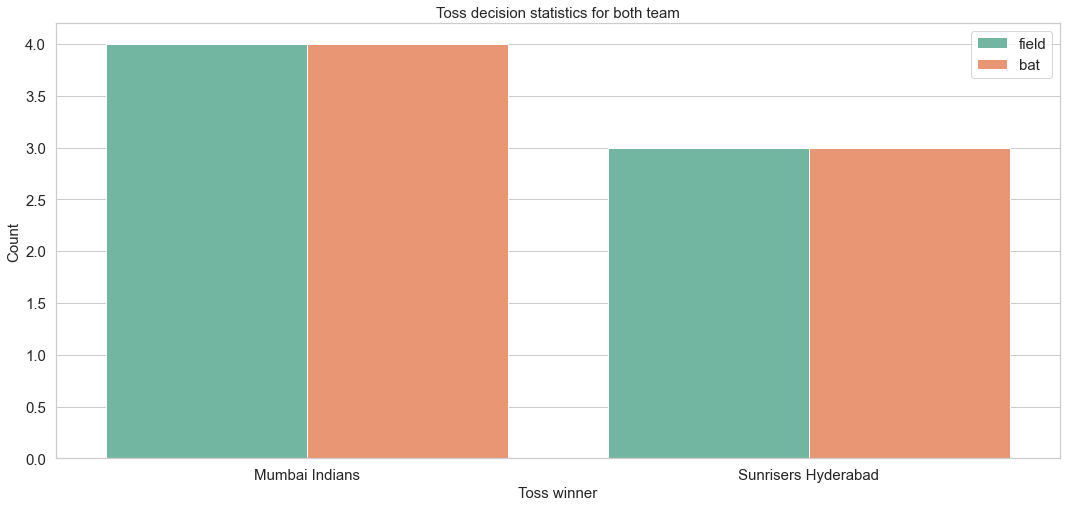

In [127]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(SM['toss_winner'],palette='Set2',hue=SM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [128]:
Toss_Decision_based_Winner = pd.DataFrame(SM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Mumbai Indians      bat           Mumbai Indians            2
                                  Sunrisers Hyderabad       2
                    field         Mumbai Indians            1
                                  Sunrisers Hyderabad       3
Sunrisers Hyderabad bat           Mumbai Indians            3
                    field         Mumbai Indians            1
                                  Sunrisers Hyderabad       2

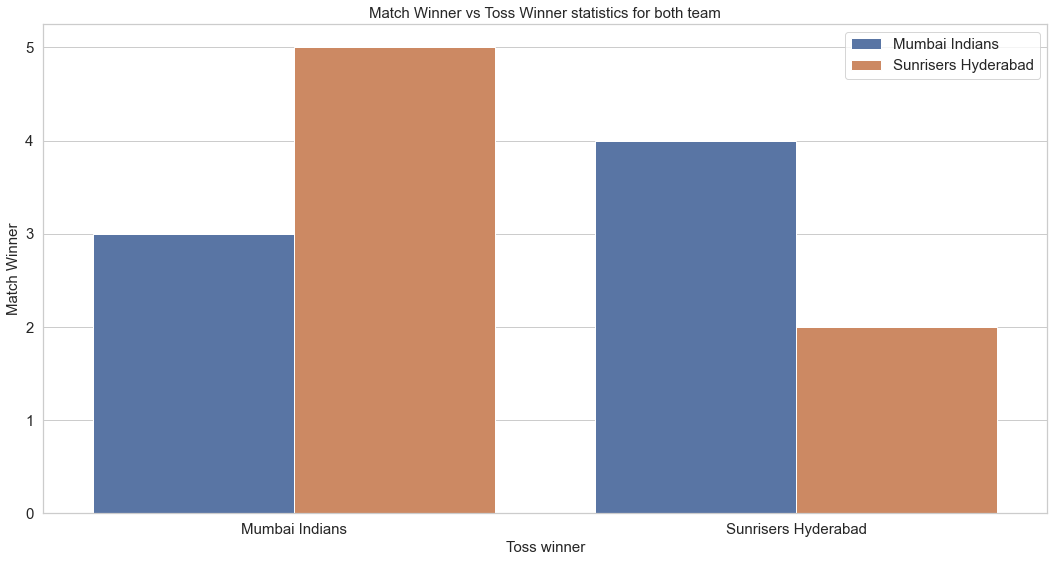

In [129]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SM['toss_winner'],hue=SM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [130]:
MI = SM[SM["toss_winner"]=="Mumbai Indians"]
SRH = SM[SM["toss_winner"]=="Sunrisers Hyderabad"]

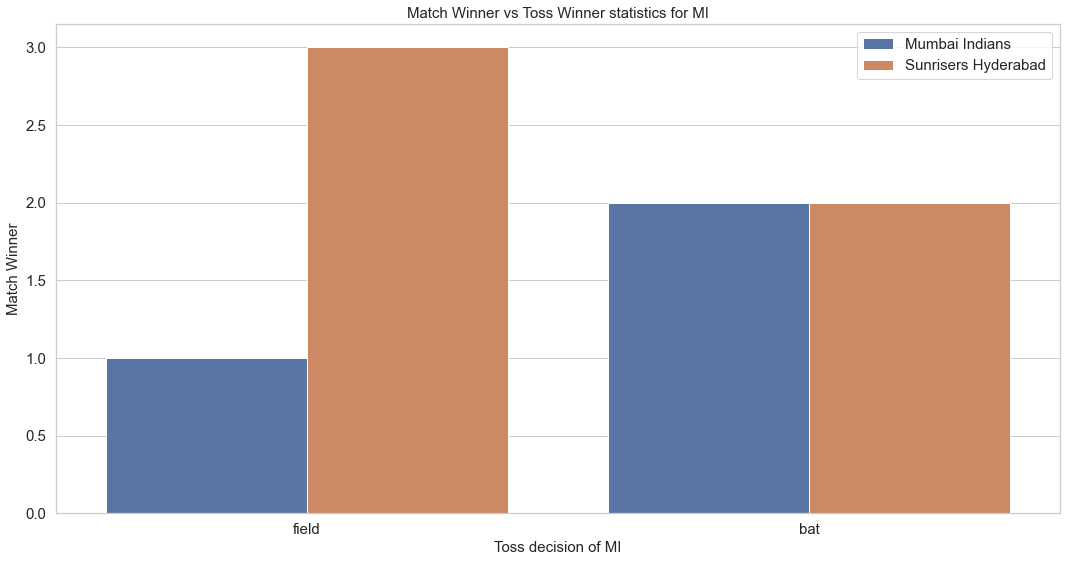

In [131]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

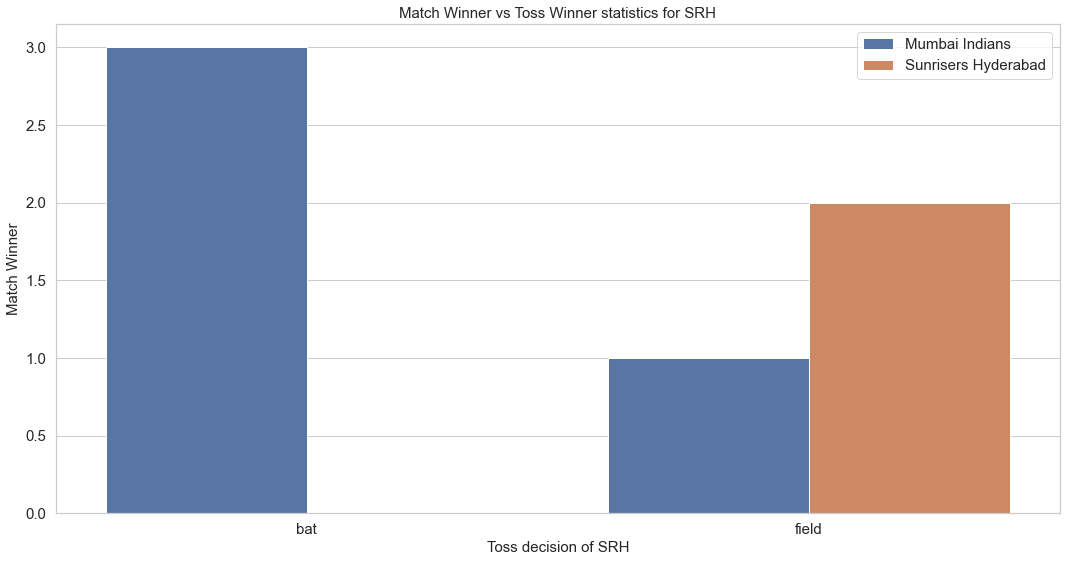

In [132]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SRH['toss_decision'],hue=SRH['winner'])
plt.title('Match Winner vs Toss Winner statistics for SRH',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of SRH',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [133]:
player_of_the_match = pd.DataFrame(SM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
JJ Bumrah,2
Rashid Khan,2
A Nehra,1
AT Rayudu,1
SL Malinga,1
B Kumar,1
A Joseph,1
MJ McClenaghan,1
S Dhawan,1
KA Pollard,1


## Recent Year Performance Analysis

In [134]:
cond2 = SM["season"] == 2018
cond3 = SM["season"] == 2019
final = SM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7900,2018,Hyderabad,12/04/18,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
7916,2018,Mumbai,24/04/18,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,31,0,Rashid Khan,Wankhede Stadium
11310,2019,Hyderabad,06/04/19,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Mumbai Indians,40,0,A Joseph,Rajiv Gandhi Intl. Cricket Stadium
11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium


In [135]:
final.shape

(4, 14)

In [136]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
Rashid Khan,2
JJ Bumrah,1
A Joseph,1


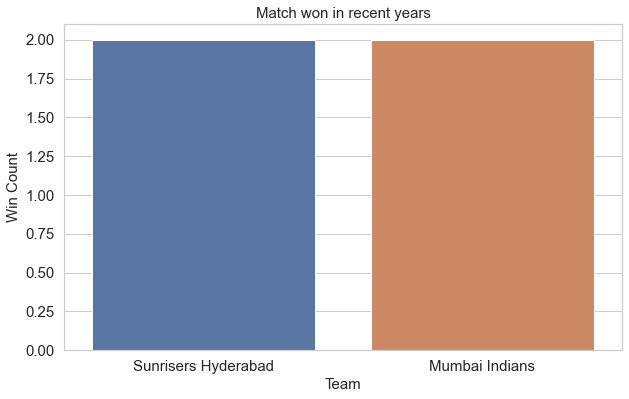

In [137]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head, Toss analysis,Performance Analysis, Recent year analysis etc we can predict that both the team have high competition in head to head . So taking in consideration toss based results and recent performance of both the teams we can predict that MI will be favorite for this match. 